In [4]:
import numpy             as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

# SV Soluble/Soluble (Eq 2)

Ratio: 0.7989685225630722


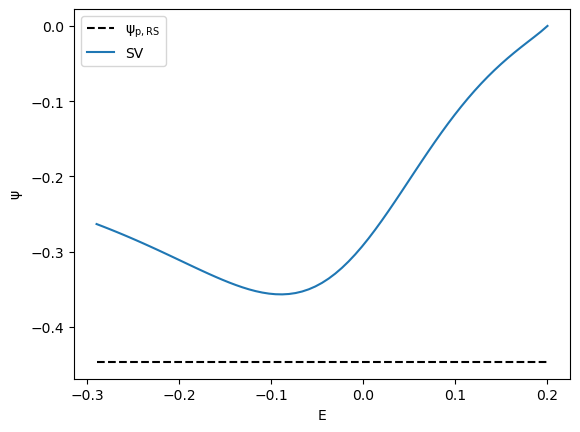

In [3]:
#adjustable parameters
n        = 1           #stoichiometric number of electrons (eq/mol)
T        = 777         #temperature                        (K)
gammaOx  = 1           #activity coefficient for Ox        
gammaRed = 1           #activity coefficient for Red
DRed     = 1.15E-9        #diffusion coefficient for Red      (m^2/s)
DOx      = 0.74E-9        #diffusion coefficient for Ox       (m^2/s)
E0       = 0           #formal potential                   (V)
#-
DeltaE   = -0.0072      #step height                        (V)
Deltat   = 0.036        #step duration                      (s)   
r        = 0.996        #sampling time delay                (fraction of Deltat)
#-
Ei       = 0.2         #initial potential                  (V)
Ef       = -0.3        #final potential                    (V)

#constants
F        = 96485       #Faraday's constant                 (C/eq)
R        = 8.314       #ideal gas constant                 (J/molK)

#calculated parameters
nu = np.abs(DeltaE) / Deltat                                 #scan rate        (V/s)
Eh = E0 + R*T/n/F*np.log(gammaOx/gammaRed*np.sqrt(DRed/DOx)) #E_1/2            (V)
k  = int(abs((Ef-Ei)/DeltaE))                                #number of steps



#-----------------------------------------------------------------------------
#set up arrays
t   = np.zeros(k)   #time                   (s)
E   = np.ones(k+1)  #potential              (V)
l   = np.zeros(k+1)  
psi = np.zeros(k)   #dimensionless current

#calculate psi
for j in range(1,k):
    if j == 1:
        E[0] = Ei
        l[0] = np.exp(n*F*(E[0] - Eh)/R/T)
        E[j] = E[0] + DeltaE
        l[j] = np.exp(n*F*(E[j] - Eh)/R/T)
        
    t[j]   = j*Deltat
    E[j+1] = E[0] + (j+1)*DeltaE
    l[j+1] = np.exp(n*F*(E[j+1] - Eh)/R/T)
    psi[j] = np.sqrt(R*T/np.pi/n/F/np.abs(DeltaE))*np.sum([(1/(1+l[i]) - 1/(1+l[i+1]))/np.sqrt(j+r-i) for i in range(j)])

#trim parameters
E = E[:-1]
l = l[:-1]

 
#------------------------------------------------------------------------------
#plot
psipRS = -0.4463
print(f'Ratio: {min(psi)/psipRS}')
plt.hlines(psipRS, float(min(E-E0)), float(max(E-E0)), 'black', 'dashed', label=r'$\mathsf{\psi_{p,RS}}$')
plt.plot(E,psi, label='SV')
plt.xlabel(r'$\mathsf{E}$')
plt.ylabel(r'$\mathsf{\psi}$')
plt.legend();

# SV Soluble/Insoluble - No Crystallization Considerations (Eq 10)

1.338745935509868


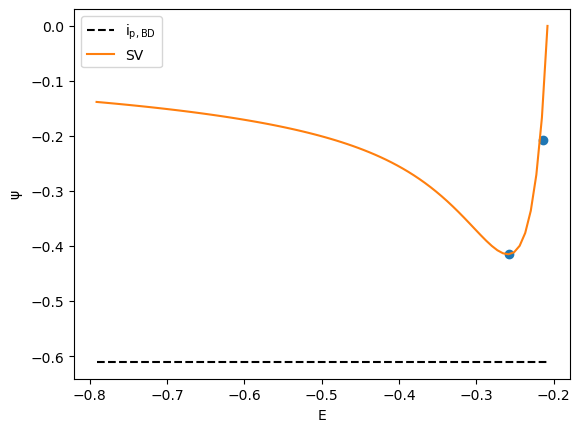

In [46]:
#adjustable parameters
n        = 2           #stoichiometric number of electrons (eq/mol)
T        = 777         #temperature                        (K)
gammaOx  = 1           #activity coefficient for Ox        
COx      = 2           #concentration of Ox       (mol/m^3)
E0       = 0           #formal potential                   (V)
#-
DeltaE   = -0.0072     #step height                        (V)
Deltat   = 0.036       #step duration                      (s)   
r        = 0.996       #sampling time delay                (fraction of Deltat)
#-
Ef       = -0.8        #final potential                    (V)

#constants
F        = 96485       #Faraday's constant                 (C/eq)
R        = 8.314       #ideal gas constant                 (J/molK)
Cref     = 1000        #reference concentration - 1M       (mol/m^3)

#calculated parameters
nu  = np.abs(DeltaE) / Deltat               #scan rate        (V/s)
Eeq = E0 + R*T/n/F*np.log(gammaOx*COx/Cref) #Eeq              (V)
k   = int(abs((Ef-Eeq)/DeltaE))              #number of steps


#-----------------------------------------------------------------------------
#set up arrays
t   = np.zeros(k)   #time                   (s)
E   = np.ones(k+1)  #potential              (V)
l   = np.zeros(k+1)  
psi = np.zeros(k)   #dimensionless current

#calculate psi
for j in range(1,k):
    if j == 1:
        E[0] = Eeq
        l[0] = np.exp(n*F*(E[0] - E[0])/R/T)
        E[j] = E[0] + DeltaE
        l[j] = np.exp(n*F*(E[j] - E[0])/R/T)
        
    t[j]   = j*Deltat
    E[j+1] = E[0] + (j+1)*DeltaE
    l[j+1] = np.exp(n*F*(E[j+1] - E[0])/R/T)
    psi[j] = np.sqrt(R*T/np.pi/n/F/np.abs(DeltaE))*np.sum([(l[i+1] - l[i])/np.sqrt(j+r-i) for i in range(j)])

#trim parameters
E = E[:-1]
l = l[:-1]

#calculate
f0 = interp1d(psi,E)
Ep = f0(min(psi))
f1 = interp1d(psi, range(len(psi))) 
f2   = interp1d(psi[:int(f1(min(psi)))], E[:int(f1(min(psi)))])
Ep2 = f2(Ep/2)
DeltaE = abs(Ep-Ep2)
a = DeltaE / (R*T/n/F)
print(a)
 
#------------------------------------------------------------------------------
#plot
plt.plot([Ep2, Ep], [min(psi)/2, min(psi)], 'o')
psipBD = -0.6105
plt.hlines(psipBD, float(min(E)), float(max(E)), 'black', 'dashed', label=r'$\mathsf{i_{p,BD}}$')
plt.plot(E, psi, label='SV')
plt.xlabel(r'$\mathsf{E}$')
plt.ylabel(r'$\mathsf{\psi}$')
plt.legend();

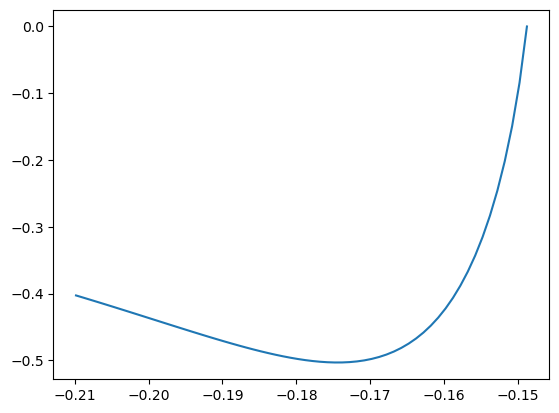

In [15]:
plt.plot(E[:int(k/4)], psi[:int(k/4)])

# SV Soluble/Insoluble - Metal ion deposition onto foreign substrate

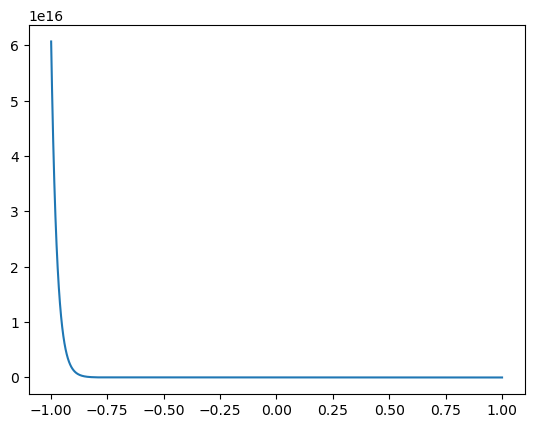

In [12]:
#adjustable parameters

E0      = 0      #V
n       = 1      #eq/mol
T       = 300    #K
gammaOx = 1
COx     = 1      #mol/m3
Ei      = 1      #V
DeltaE  = -0.001 #V
k       = 2000

R  = 8.314 #J/mol/K
F  = 96485 #C/eq


E    = np.array([Ei + DeltaE*j for j in range(k)])
aRed = 1 - np.exp(-3.91E-3*theta - 6.9*theta**10.5)

plt.plot(E, aRed);